### AI-09 Practice 1  

#### Import libraries  

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump

#### Parameters  

In [26]:
csv_in = 'ai-10-quiz.csv'

#### Read CSV file  

In [27]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
df = df.dropna().reset_index(drop=True)
print(df.shape)
display(df.head())

(200, 4)


,f1,f2,f3,b
0,6.11,9.35,6.03,48.30
1,9.59,7.44,8.06,46.00
2,8.83,7.59,6.48,46.02
3,5.94,5.40,8.69,42.45
4,7.21,5.79,9.40,43.03


#### Get X and y  

In [28]:
X = df.loc[:, 'f1':'f3']  # explanatory variables
y = df['b']  # objective variable
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (200, 3)


,f1,f2,f3
0,6.11,9.35,6.03
1,9.59,7.44,8.06
2,8.83,7.59,6.48
3,5.94,5.40,8.69
4,7.21,5.79,9.40


y: (200,)
0    48.30
1    46.00
2    46.02
3    42.45
4    43.03
Name: b, dtype: float64


#### Split X and y for train and test  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)
print(X_train.head())

       f1    f2    f3
38   7.63  8.30  9.46
44   9.07  6.32  5.32
148  6.06  9.88  9.19
185  5.41  6.61  6.08
46   5.85  5.98  9.07


#### Scaling  

In [30]:
sc = MinMaxScaler(feature_range=(0, 1), copy=True)
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#### Parameters for SVR  

In [31]:
C = 1
gamma = 'scale'
epsilon = 0.01

#### Execute SVR  

In [32]:
svr = SVR(gamma=gamma, C=C, epsilon=epsilon)
svr.fit(X_train_std, y_train)

SVR(C=1, epsilon=0.01)

#### Do prediction using train data  

In [33]:
y_train_pred = svr.predict(X_train_std)

#### Scaling of Test data and do prediction  

In [34]:
X_test_std = sc.transform(X_test)
y_test_pred = svr.predict(X_test_std)

#### Check MSE  

In [35]:
mse_train = mean_squared_error(y_train_pred, y_train)
print('MSE (train):', mse_train)
mse_test = mean_squared_error(y_test_pred, y_test)
print('MSE (test):', mse_test)

MSE (train): 2.5377668124741417
MSE (test): 3.5386418504059476


**Ans. 0.478**  

#### Scatter plot of output of SVR (prediction) and true value for train / test data  

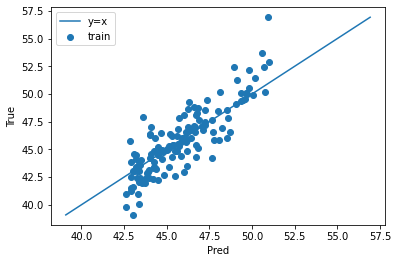

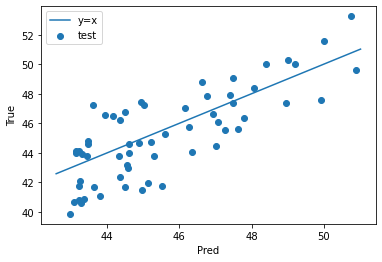

In [36]:
plt.scatter(y_train_pred, y_train, label='train')
xmin = np.array([y_train.min(), y_train.max()])
xmax = np.array([y_train.min(), y_train.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

plt.scatter(y_test_pred, y_test, label='test')
xmin = np.array([y_train_pred.min(), y_train_pred.max()])
xmax = np.array([y_train_pred.min(), y_train_pred.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

#### Save developed SVR model  

In [37]:
tag = 'ai-09-practice1'
sc_file = 'sc_{}.joblib'.format(tag)
dump(sc, sc_file)
model_file = 'svr_{}.joblib'.format(tag)
dump(svr, model_file)

['svr_ai-09-practice1.joblib']

In [38]:
print(y_train_pred)
print(y_train)

[44.19576424 48.54212262 43.53605991 43.44478547 43.01691479 42.89920775
 49.37039768 49.13912928 42.6080092  49.57970784 46.64307926 49.85146898
 51.02312626 43.94083932 42.58211011 46.64738854 45.48814216 46.62339897
 50.9553923  45.57888985 42.88786996 47.67977232 45.47183205 44.23954753
 43.22115002 44.9929244  45.73092621 43.87240364 50.58608173 45.86108138
 46.33991271 49.70036474 45.66661185 48.97322482 45.84707564 43.99306528
 46.82295435 45.90292746 46.8192186  43.08015268 47.62847024 43.32999206
 43.37680205 47.35739288 50.73181638 44.74487211 49.44965525 48.15051711
 43.73686677 44.639806   43.23991531 46.17385845 48.57345323 44.81484449
 49.83249582 47.07972553 44.72928942 43.24426411 47.11105255 48.73722686
 43.5962651  49.66612539 44.62827864 45.17539771 46.71825444 46.15597593
 44.08381074 46.25193955 47.24751408 45.72982947 45.3802473  47.70784735
 43.04047803 45.03019941 49.08907456 45.13300012 43.81499347 43.33744477
 45.31334944 46.21340422 46.57378715 47.22006668 43